# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# !pip install --upgrade jupyter
# !pip install --upgrade ipywidgets

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
## YOUR CODE HERE ##
transform=transforms.Compose([transforms.ToTensor()])
# Create training set and define training dataloader
## YOUR CODE HERE ##
train_data=torchvision.datasets.MNIST('data',train=True,download=True,transform=transform)
test_data=torchvision.datasets.MNIST('data',train=False,download=True,transform=transform)
# Create test set and define test dataloader
## YOUR CODE HERE ##
valid_size=0.2

# IMPORTANT 
batch_size=20

num_workers=0

train_length = len(train_data)

# obtain training dataset indices that will be used for validation dataset
indices = list(range(train_length))

np.random.shuffle(indices)
split = int(np.floor(valid_size * train_length))
train_idx, valid_idx = indices[split:], indices[:split]


# prepare data loaders for train, test and validation dataset
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
train_idx.__len__(),valid_idx.__len__()

(48000, 12000)

In [6]:
# Printing the length of our train, valid and test dataloaders
# NOTE : Here batch size is 20
len(train_loader),len(valid_loader),len(test_loader)

(3000, 3000, 500)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [8]:
# Explore data
## YOUR CODE HERE ##
# checking our data
dataiter=iter(train_loader)
images,labels=dataiter.next()
print(images, images.shape, len(images), images[0].shape)
print()
print(labels,labels.shape,len(labels))

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

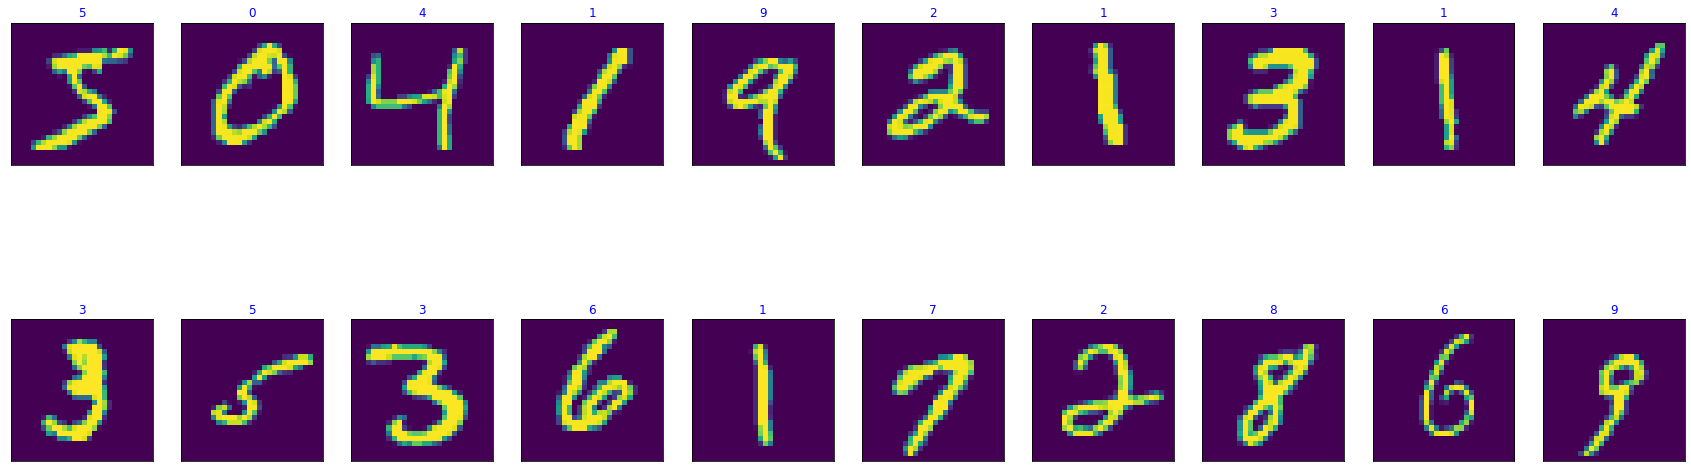

In [9]:
# Displaying images and labels of a batch
fig=plt.figure(figsize=(30,10))
for i in range(len(labels)):
    ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images[i]))
    ax.set_title(labels[i].item(),color='blue')

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [10]:
## YOUR CODE HERE ##
# Model 1 : This model has dropout set to a certain value
# NOTE : When we want to use dropout we ensure we run train() method on our model --- during training , if not required we should use eval() method --- validation and testing
class FNet(nn.Module):
    def __init__(self):
        super(FNet,self).__init__()
        self.fc1=nn.Linear(784,512)
        self.fc2=nn.Linear(512,256)
        self.out=nn.Linear(256,10)
        
        # Dropout probability - set for avoiding overfitting
        self.dropout=nn.Dropout(0.2)

    def forward(self,x):
        x = x.view(-1, 28 * 28)        
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.out(x)
        return x

class convNet(nn.Module):
    def __init__(self):
        super(convNet,self).__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,padding=1,stride=1)
        self.conv2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=1,stride=1)
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)

        self.fc1=nn.Linear(7*7*32,512)
        self.fc2=nn.Linear(512,256)
        self.out=nn.Linear(256,10)
        self.dropout=nn.Dropout(0.2)

    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,7*7*32)
        x = self.dropout(x)
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=self.out(x)
        return x
    

In [11]:
model_1=FNet()
model_2=convNet()

def weight_init_normal(m):
    classname=m.__class__.__name__
    if classname.find('Linear')!=-1:
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
model_1.apply(weight_init_normal),model_2.apply(weight_init_normal)
use_cuda=True
if use_cuda and torch.cuda.is_available():
    model_1.cuda()
    model_2.cuda()


print(model_1,'\n\n\n\n',model_2,'\n\n\n\n','On GPU : ',torch.cuda.is_available())

FNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 



 convNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
) 



 On GPU :  True


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [12]:
## YOUR CODE HERE ##
criterion=nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [13]:
## YOUR CODE HERE ##
def trainNet(model,lr):
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)


    # Number of epochs to train for
    loss_keeper={'train':[],'valid':[]}
    epochs=20

    # minimum validation loss ----- set initial minimum to infinity
    valid_loss_min = np.Inf 

    for epoch in range(epochs):
        train_loss=0.0
        valid_loss=0.0

        """
        TRAINING PHASE
        """
        model.train() # TURN ON DROPOUT for training
        for images,labels in train_loader:
            if use_cuda and torch.cuda.is_available():
                images,labels=images.cuda(),labels.cuda()
            optimizer.zero_grad()
            output=model(images)
            loss=criterion(output,labels)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()

        """
        VALIDATION PHASE
        """
        model.eval() # TURN OFF DROPOUT for validation
        for images,labels in valid_loader:
            if use_cuda and torch.cuda.is_available():
                images,labels=images.cuda(),labels.cuda()
            output=model(images)
            loss=criterion(output,labels)
            valid_loss+=loss.item()

        # Calculating loss over entire batch size for every epoch
        train_loss = train_loss/len(train_loader)
        valid_loss = valid_loss/len(valid_loader)


        # saving loss values
        loss_keeper['train'].append(train_loss)
        loss_keeper['valid'].append(valid_loss)

        print(f"\nEpoch : {epoch+1}\tTraining Loss : {train_loss}\tValidation Loss : {valid_loss}")
        if valid_loss<=valid_loss_min:
            print(f"Validation loss decreased from : {valid_loss_min} ----> {valid_loss} ----> Saving Model.......")
            z=type(model).__name__
            torch.save(model.state_dict(), z+'_model.pth')
            valid_loss_min=valid_loss
    return(loss_keeper)

In [14]:
m1_loss=trainNet(model_1,0.001)


Epoch : 1	Training Loss : 0.22180837587632898	Validation Loss : 0.13797822052648795
Validation loss decreased from : inf ----> 0.13797822052648795 ----> Saving Model.......

Epoch : 2	Training Loss : 0.11108603898093133	Validation Loss : 0.07383639641215935
Validation loss decreased from : 0.13797822052648795 ----> 0.07383639641215935 ----> Saving Model.......

Epoch : 3	Training Loss : 0.0864355913229941	Validation Loss : 0.09285710924295411

Epoch : 4	Training Loss : 0.07114873780966355	Validation Loss : 0.08132220679716573

Epoch : 5	Training Loss : 0.06466372382033005	Validation Loss : 0.05700254461285289
Validation loss decreased from : 0.07383639641215935 ----> 0.05700254461285289 ----> Saving Model.......

Epoch : 6	Training Loss : 0.05390571263093155	Validation Loss : 0.04303469525316691
Validation loss decreased from : 0.05700254461285289 ----> 0.04303469525316691 ----> Saving Model.......

Epoch : 7	Training Loss : 0.050539088893757765	Validation Loss : 0.03843209527423504
V

In [15]:
m1_loss

{'train': [0.22180837587632898,
  0.11108603898093133,
  0.0864355913229941,
  0.07114873780966355,
  0.06466372382033005,
  0.05390571263093155,
  0.050539088893757765,
  0.047677714135378586,
  0.043727436686188295,
  0.04113146031564251,
  0.038885647462943984,
  0.04125882182457648,
  0.03602236362528522,
  0.03914066098012871,
  0.035266338879363784,
  0.03374049981827754,
  0.03599470964833772,
  0.03293929260993358,
  0.03199886313138515,
  0.03530241472405941],
 'valid': [0.13797822052648795,
  0.07383639641215935,
  0.09285710924295411,
  0.08132220679716573,
  0.05700254461285289,
  0.04303469525316691,
  0.03843209527423504,
  0.0343435679761218,
  0.022425429869944877,
  0.020574990421173008,
  0.01886834858697806,
  0.01911868003907131,
  0.017087301436866834,
  0.016690626214420398,
  0.028280217403057577,
  0.016345229754410377,
  0.008717456165353176,
  0.009686398652479153,
  0.010226726742462574,
  0.010971705413803986]}

In [16]:
m2_loss=trainNet(model_2,0.001)


Epoch : 1	Training Loss : 0.1570126029849586	Validation Loss : 0.05301929434991204
Validation loss decreased from : inf ----> 0.05301929434991204 ----> Saving Model.......

Epoch : 2	Training Loss : 0.06286673432739766	Validation Loss : 0.028727748075519532
Validation loss decreased from : 0.05301929434991204 ----> 0.028727748075519532 ----> Saving Model.......

Epoch : 3	Training Loss : 0.047309779851964016	Validation Loss : 0.02878559689833067

Epoch : 4	Training Loss : 0.0391837998255167	Validation Loss : 0.020925389950074334
Validation loss decreased from : 0.028727748075519532 ----> 0.020925389950074334 ----> Saving Model.......

Epoch : 5	Training Loss : 0.03293148769958242	Validation Loss : 0.02479353051366696

Epoch : 6	Training Loss : 0.026734159324332714	Validation Loss : 0.019846412289799987
Validation loss decreased from : 0.020925389950074334 ----> 0.019846412289799987 ----> Saving Model.......

Epoch : 7	Training Loss : 0.026844791927182952	Validation Loss : 0.0203004195

In [17]:
m2_loss

{'train': [0.1570126029849586,
  0.06286673432739766,
  0.047309779851964016,
  0.0391837998255167,
  0.03293148769958242,
  0.026734159324332714,
  0.026844791927182952,
  0.024633407550076897,
  0.022691598302087005,
  0.018627600402982294,
  0.01863319561370534,
  0.019691836090903997,
  0.01810494279805401,
  0.017246534230952758,
  0.016990276188420625,
  0.016024557554403428,
  0.01652766407722483,
  0.017153017174824807,
  0.015148998445690922,
  0.016240134810950844],
 'valid': [0.05301929434991204,
  0.028727748075519532,
  0.02878559689833067,
  0.020925389950074334,
  0.02479353051366696,
  0.019846412289799987,
  0.020300419596104055,
  0.009636768015811932,
  0.010579939366680334,
  0.005564283078187632,
  0.006689323658070665,
  0.005923720891020399,
  0.008588488385980439,
  0.00514634939633934,
  0.003979108364160719,
  0.0038652393736964678,
  0.008367556998933587,
  0.003066687608203823,
  0.006286678276933343,
  0.0022435584690884765]}

In [18]:
# Loading the model from the lowest validation loss 
model_1.load_state_dict(torch.load('FNet_model.pth'))
model_2.load_state_dict(torch.load('convNet_model.pth'))

<All keys matched successfully>

In [19]:
print(model_1.state_dict,'\n\n\n\n',model_2.state_dict)

<bound method Module.state_dict of FNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)> 



 <bound method Module.state_dict of convNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)>


Plot the training loss (and validation loss/accuracy, if recorded).

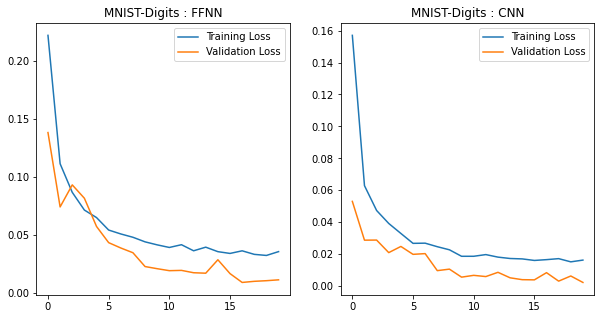

In [20]:
## YOUR CODE HERE ##
title=['FFNN','CNN']
model_losses=[m1_loss,m2_loss]
fig=plt.figure(1,figsize=(10,5))
idx=1
for i in model_losses:
    ax=fig.add_subplot(1,2,idx)
    ax.plot(i['train'],label="Training Loss")
    ax.plot(i['valid'],label="Validation Loss")
    ax.set_title('MNIST-Digits : '+title[idx-1])
    idx+=1
    plt.legend();

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [21]:
## YOUR CODE HERE ##
def test(model):
    correct=0
    test_loss=0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval() # test the model with dropout layers off
    for images,labels in test_loader:
        if use_cuda and torch.cuda.is_available():
            images,labels=images.cuda(),labels.cuda()
        output=model(images)
        loss=criterion(output,labels)
        test_loss+=loss.item()
        _,pred=torch.max(output,1)
        correct = np.squeeze(pred.eq(labels.data.view_as(pred)))

        for i in range(batch_size):
            label = labels.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1


    test_loss=test_loss/len(test_loader)
    print(f'For {type(model).__name__} :')
    print(f"Test Loss: {test_loss}")
    print(f"Correctly predicted per class : {class_correct}, Total correctly perdicted : {sum(class_correct)}")
    print(f"Total Predictions per class : {class_total}, Total predictions to be made : {sum(class_total)}\n")
    for i in range(10):
        if class_total[i] > 0:
            print(f"Test Accuracy of class {i} : {float(100 * class_correct[i] / class_total[i])}% where {int(np.sum(class_correct[i]))} of {int(np.sum(class_total[i]))} were predicted correctly")
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print(f"\nOverall Test Accuracy : {float(100. * np.sum(class_correct) / np.sum(class_total))}% where {int(np.sum(class_correct))} of {int(np.sum(class_total))} were predicted correctly")
    # obtain one batch of test images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    # get sample outputs
    if use_cuda and torch.cuda.is_available():
        images,labels=images.cuda(),labels.cuda()
    output = model(images)
    # convert output probabilities to predicted class
    _, preds = torch.max(output, 1)
    # prep images for display
    images = images.cpu().numpy()

    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(25, 4))
    for idx in np.arange(20):
        ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(images[idx]))
        ax.set_title("{} for ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                    color=("blue" if preds[idx]==labels[idx] else "red"))
     

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

For FNet :
Test Loss: 0.1072433885632235
Correctly predicted per class : [972.0, 1130.0, 1016.0, 987.0, 965.0, 874.0, 937.0, 1004.0, 954.0, 981.0], Total correctly perdicted : 9820.0
Total Predictions per class : [980.0, 1135.0, 1032.0, 1010.0, 982.0, 892.0, 958.0, 1028.0, 974.0, 1009.0], Total predictions to be made : 10000.0

Test Accuracy of class 0 : 99.18367346938776% where 972 of 980 were predicted correctly
Test Accuracy of class 1 : 99.55947136563877% where 1130 of 1135 were predicted correctly
Test Accuracy of class 2 : 98.44961240310077% where 1016 of 1032 were predicted correctly
Test Accuracy of class 3 : 97.72277227722772% where 987 of 1010 were predicted correctly
Test Accuracy of class 4 : 98.26883910386965% where 965 of 982 were predicted correctly
Test Accuracy of class 5 : 97.98206278026906% where 874 of 892 were predicted correctly
Test Accuracy of class 6 : 97.80793319415449% where 937 of 958 were predicted correctly
Test Accuracy of class 7 : 97.66536964980544% whe

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


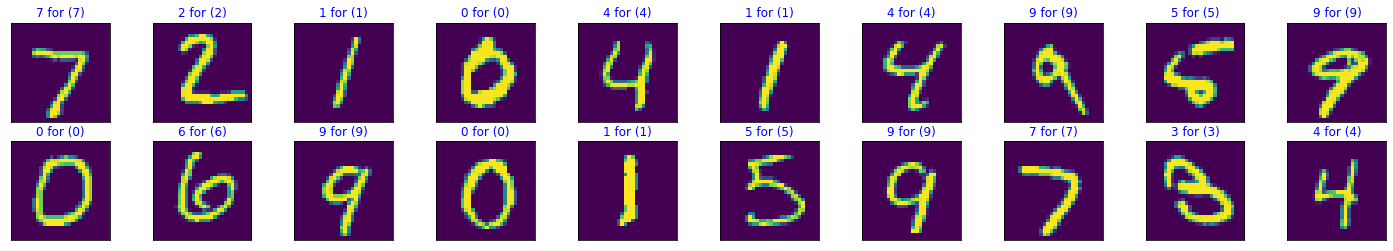

In [22]:
## YOUR CODE HERE ##
test(model_1)

For convNet :
Test Loss: 0.035011115513800165
Correctly predicted per class : [978.0, 1134.0, 1021.0, 1003.0, 974.0, 884.0, 946.0, 1022.0, 967.0, 1000.0], Total correctly perdicted : 9929.0
Total Predictions per class : [980.0, 1135.0, 1032.0, 1010.0, 982.0, 892.0, 958.0, 1028.0, 974.0, 1009.0], Total predictions to be made : 10000.0

Test Accuracy of class 0 : 99.79591836734694% where 978 of 980 were predicted correctly
Test Accuracy of class 1 : 99.91189427312776% where 1134 of 1135 were predicted correctly
Test Accuracy of class 2 : 98.93410852713178% where 1021 of 1032 were predicted correctly
Test Accuracy of class 3 : 99.3069306930693% where 1003 of 1010 were predicted correctly
Test Accuracy of class 4 : 99.18533604887983% where 974 of 982 were predicted correctly
Test Accuracy of class 5 : 99.10313901345292% where 884 of 892 were predicted correctly
Test Accuracy of class 6 : 98.74739039665971% where 946 of 958 were predicted correctly
Test Accuracy of class 7 : 99.416342412451

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


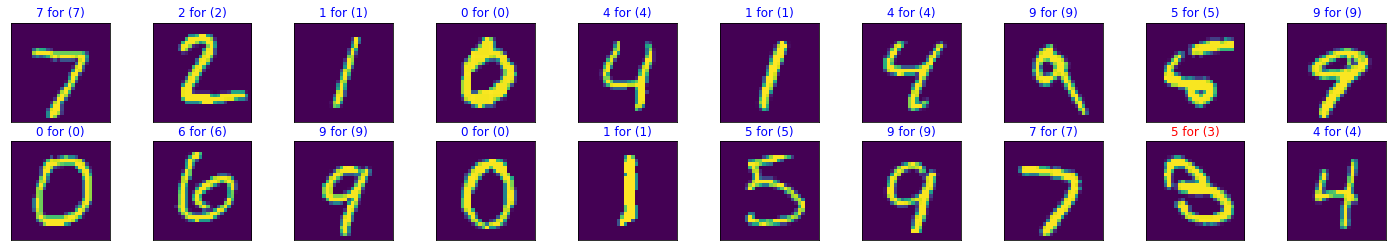

In [23]:
test(model_2)

## Saving your model
Using `torch.save`, save your model for future loading.

In [25]:
## YOUR CODE HERE ##
torch.save(model_1,'./MODEL_1.pth')

In [26]:
torch.save(model_2,'./MODEL_2.pth')